# (a) Generate a simulated dataset with 20 observations in each of 3 classes (total 60 observations) and 50 variables.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
np.random.seed(42)
n_classes = 3
n_samples_per_class = 20
n_features = 50

#Create data for each class with a distinct mean shift
class_means = np.array([0, 5, 10])
X = np.vstack([np.random.normal(loc=mean, scale=1.0, size=(n_samples_per_class, n_features)) 
               for mean in class_means])
y_true = np.array([0]*n_samples_per_class + [1]*n_samples_per_class + [2]*n_samples_per_class)

print(X.shape)

(60, 50)


# (b) Perform PCA on the 60 observations and plot the first two principal components.

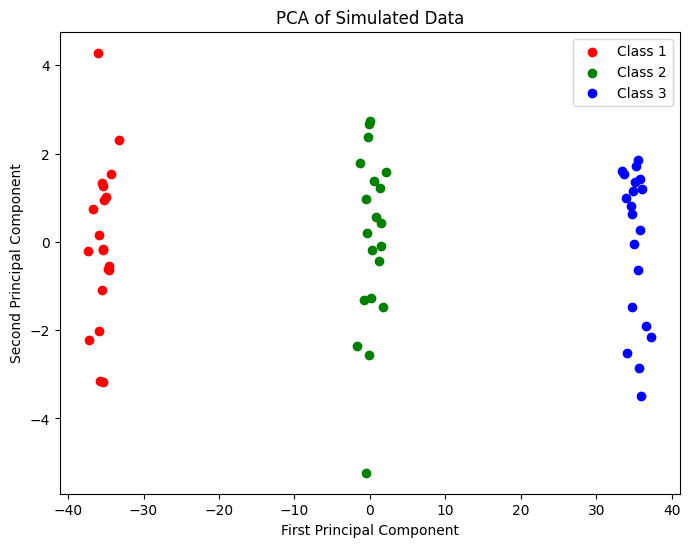

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[y_true == 0, 0], X_pca[y_true == 0, 1], label='Class 1', color='r')
plt.scatter(X_pca[y_true == 1, 0], X_pca[y_true == 1, 1], label='Class 2', color='g')
plt.scatter(X_pca[y_true == 2, 0], X_pca[y_true == 2, 1], label='Class 3', color='b')
plt.title('PCA of Simulated Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

# (c) Perform K-means clustering with K=3 and compare to true labels.

Confusion Matrix for K=3 Clustering:
K-means   0   1   2
True               
0         0   0  20
1        20   0   0
2         0  20   0


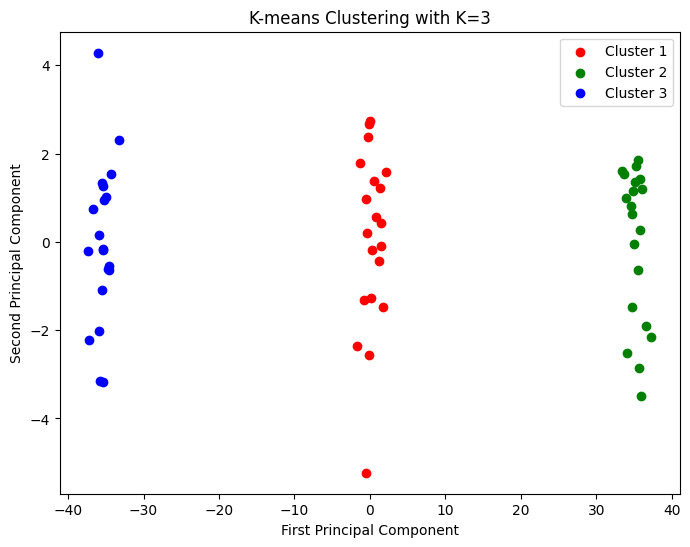

In [12]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(X)
y_kmeans_3 = kmeans_3.labels_

#Compare with true labels using a confusion matrix
print("Confusion Matrix for K=3 Clustering:")
print(pd.crosstab(y_true, y_kmeans_3, rownames=['True'], colnames=['K-means']))

plt.figure(figsize=(8,6))
plt.scatter(X_pca[y_kmeans_3 == 0, 0], X_pca[y_kmeans_3 == 0, 1], label='Cluster 1', color='r')
plt.scatter(X_pca[y_kmeans_3 == 1, 0], X_pca[y_kmeans_3 == 1, 1], label='Cluster 2', color='g')
plt.scatter(X_pca[y_kmeans_3 == 2, 0], X_pca[y_kmeans_3 == 2, 1], label='Cluster 3', color='b')
plt.title('K-means Clustering with K=3')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

# (d) Perform K-means clustering with K=2 and describe the results.

Confusion Matrix for K=2 Clustering:
K-means   0   1
True           
0        20   0
1        20   0
2         0  20


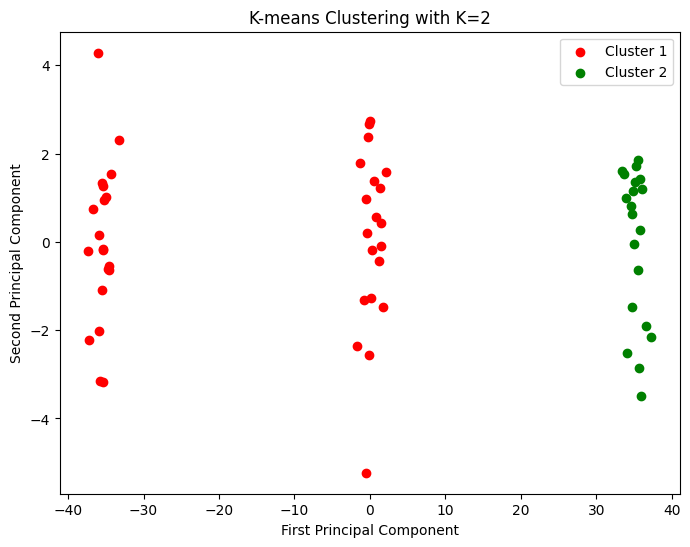

In [13]:
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(X)
y_kmeans_2 = kmeans_2.labels_

print("Confusion Matrix for K=2 Clustering:")
print(pd.crosstab(y_true, y_kmeans_2, rownames=['True'], colnames=['K-means']))


plt.figure(figsize=(8,6))
plt.scatter(X_pca[y_kmeans_2 == 0, 0], X_pca[y_kmeans_2 == 0, 1], label='Cluster 1', color='r')
plt.scatter(X_pca[y_kmeans_2 == 1, 0], X_pca[y_kmeans_2 == 1, 1], label='Cluster 2', color='g')
plt.title('K-means Clustering with K=2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

Compare to the plot which located in (c),it seems that tha datas belong to cluster 3 becomes a part of cluster 1.Means that class 1 has similar feature of cluster 1.

# (e) Perform K-means clustering with K=4 and describe the results.

Confusion Matrix for K=4 Clustering:
K-means  0   1   2   3
True                  
0        0   0  20   0
1        8   0   0  12
2        0  20   0   0


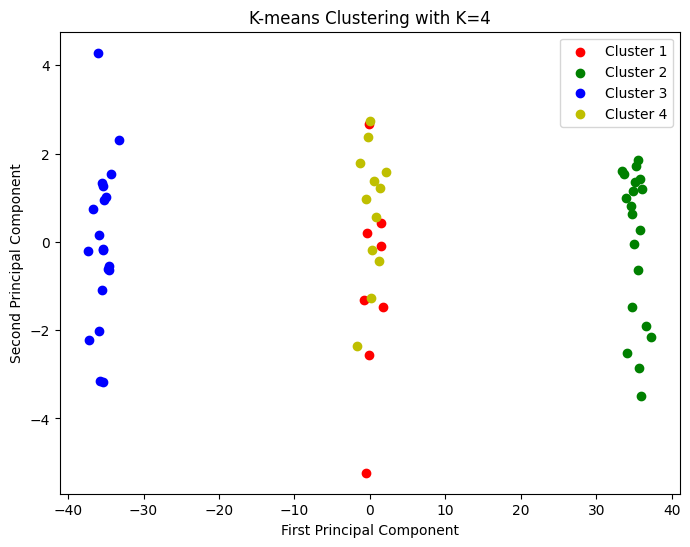

In [16]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(X)
y_kmeans_4 = kmeans_4.labels_

print("Confusion Matrix for K=4 Clustering:")
print(pd.crosstab(y_true, y_kmeans_4, rownames=['True'], colnames=['K-means']))

plt.figure(figsize=(8,6))
plt.scatter(X_pca[y_kmeans_4 == 0, 0], X_pca[y_kmeans_4 == 0, 1], label='Cluster 1', color='r')
plt.scatter(X_pca[y_kmeans_4 == 1, 0], X_pca[y_kmeans_4 == 1, 1], label='Cluster 2', color='g')
plt.scatter(X_pca[y_kmeans_4 == 2, 0], X_pca[y_kmeans_4 == 2, 1], label='Cluster 3', color='b')
plt.scatter(X_pca[y_kmeans_4 == 3, 0], X_pca[y_kmeans_4 == 3, 1], label='Cluster 4', color='y')
plt.title('K-means Clustering with K=4')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()



Compare to the plot of (c),cluster 1 has some new feature.Than we sort some data to cluster 4.Seems that class 2 is to have some diversification a little bit

# (f) Perform K-means clustering with K=3 on the two principal components instead of the raw data.

Confusion Matrix for K=3 Clustering on PCA-transformed data:
K-means   0   1   2
True               
0         0   0  20
1        20   0   0
2         0  20   0


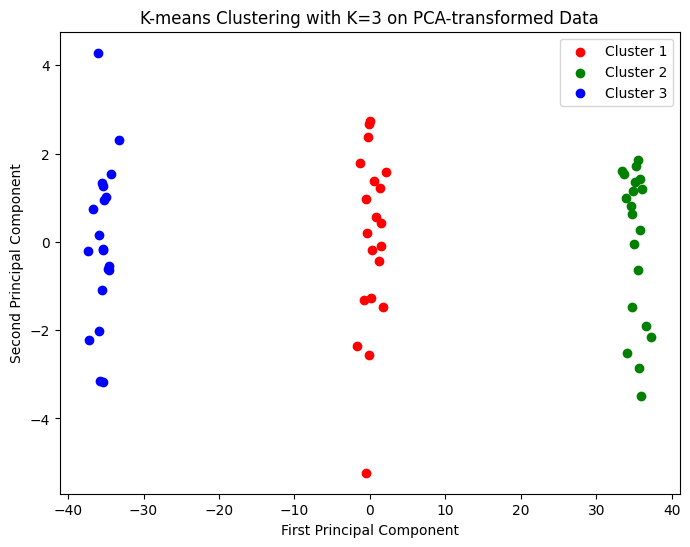

In [17]:
kmeans_pca_3 = KMeans(n_clusters=3, random_state=42)
kmeans_pca_3.fit(X_pca)
y_kmeans_pca_3 = kmeans_pca_3.labels_

print("Confusion Matrix for K=3 Clustering on PCA-transformed data:")
print(pd.crosstab(y_true, y_kmeans_pca_3, rownames=['True'], colnames=['K-means']))

plt.figure(figsize=(8,6))
plt.scatter(X_pca[y_kmeans_pca_3 == 0, 0], X_pca[y_kmeans_pca_3 == 0, 1], label='Cluster 1', color='r')
plt.scatter(X_pca[y_kmeans_pca_3 == 1, 0], X_pca[y_kmeans_pca_3 == 1, 1], label='Cluster 2', color='g')
plt.scatter(X_pca[y_kmeans_pca_3 == 2, 0], X_pca[y_kmeans_pca_3 == 2, 1], label='Cluster 3', color='b')
plt.title('K-means Clustering with K=3 on PCA-transformed Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


# (g) Using StandardScaler, scale the data and perform K-means clustering with K=3, then compare the results.

Confusion Matrix for K=3 Clustering after Scaling:
K-means   0   1   2
True               
0         0   0  20
1        20   0   0
2         0  20   0


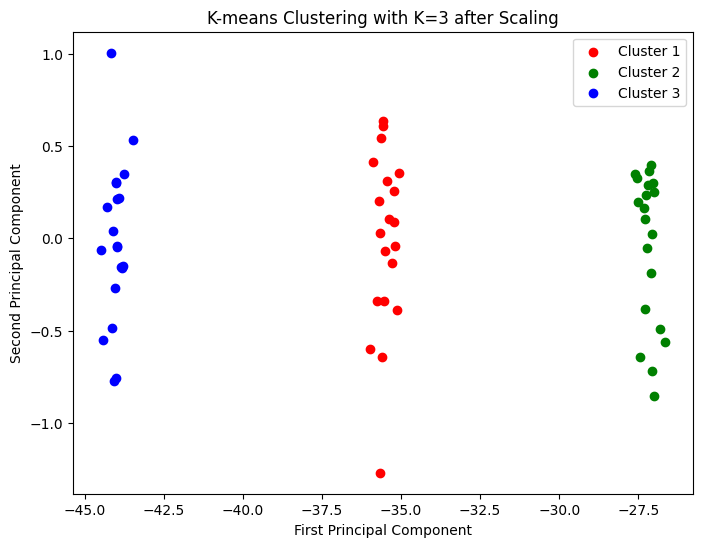

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_scaled_3 = KMeans(n_clusters=3, random_state=42)
kmeans_scaled_3.fit(X_scaled)
y_kmeans_scaled_3 = kmeans_scaled_3.labels_

print("Confusion Matrix for K=3 Clustering after Scaling:")
print(pd.crosstab(y_true, y_kmeans_scaled_3, rownames=['True'], colnames=['K-means']))

plt.figure(figsize=(8,6))
X_pca_scaled = pca.transform(X_scaled)  # Reuse PCA projection for consistency
plt.scatter(X_pca_scaled[y_kmeans_scaled_3 == 0, 0], X_pca_scaled[y_kmeans_scaled_3 == 0, 1], label='Cluster 1', color='r')
plt.scatter(X_pca_scaled[y_kmeans_scaled_3 == 1, 0], X_pca_scaled[y_kmeans_scaled_3 == 1, 1], label='Cluster 2', color='g')
plt.scatter(X_pca_scaled[y_kmeans_scaled_3 == 2, 0], X_pca_scaled[y_kmeans_scaled_3 == 2, 1], label='Cluster 3', color='b')
plt.title('K-means Clustering with K=3 after Scaling')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()